# Tiny GD - A Friendly Implementation of Gradient Descent


### Hi!
### This is a simple and friendly introduction to the Gradient Descent algorithm meant for anybody who's new to Machine Learning or wishes to get a simpler intuition to the process. 

### Let's begin.

**Say we have a function, let's make it something simple: ** 
### y = (x+5)<sup>2

**What do we know about functions? Let's recall.**

* For all x and y such that : f(x) = y, whenever x changes, y changes too.
* For each value of x, there is a corresponding value of y.
* The relationship between x and y can be plotted graphically.

**We can take several x's and get corresponding y's that obey this function. Let us try to do that!**

In [1]:
# Importing the required Python libraries

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Getting 100 random points for x
# np.linspace(-10,10,100) returns 100 evenly spaced numbers in the range of -10 to 10

x = np.linspace(10,-10,100)

# Defining our function

y = (x+5)**2

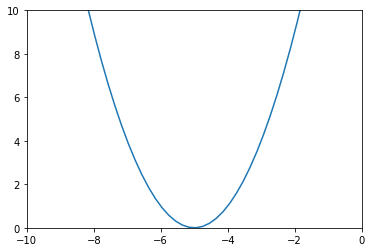

In [3]:
# Plotting the function as a graph

fix, ax = plt.subplots()

# Setting x and y axes' scale

plt.xlim([-10,0])
plt.ylim([0,10])


# Plotting a larger figure by setting custom dimensions using rcParams method in pyplot

plt.rcParams['figure.figsize'] = [10, 5]


ax.plot(x,y)



plt.show()

**Suppose we want to find the _Local Minima_ or the point in the graph where the values of x and y are the minimum, what do we do?**

**By looking at the above graph we can intuitively say that the Local Minima occurs at the following points :
            y = 0 and x = -5.** (When we plug y = 0 into our function, we get x = -5)

**Let us write a few lines of code in order to obtain this result using Gradient Descent.**

### Suppose we are standing on the slope of the above graph at point x = 2 and we attempt to slowly walk our way down to the Local Minima. We take _n_ tiny steps on our way, let us call this step alpha(also called the learning rate). 

### If the process of taking each optimally selected step downhill is called one iteration, how many iterations will it take for us to reach local minima? Here's the algorithm to compute that!

In [4]:
# Initializing the algorithm at 2

current_position = 2

# Setting the step size or learning rate to be 0.01

alpha = 0.01

# Precision is used to stop our algorithm.
# If we have a result that is precise to our level of satisfaction, we stop running the algo!

"""If the difference between our current position and our updated position after taking 
a step down becomes < precision, our algorithm will stop iterating because we are where we want to be!

I want my algorithm to be precise to the order of magnitude of 10^-6, so I am setting precision as follows:"""

precision = 0.000001 

# Initializing the step_size variable = 1 in order to compare and compute precision.

step_size = 1 

# We don't want to take more than 10,000 steps!(Obviously)
# In fact, we want to reach Local Minima in the least number of steps possible.
# If the number of our iterations becomes more than 10000, our algorithm will stop.

max_iters = 10000 

# We will store the number of iterations in the iters variable which will keep getting updated after each iteration.
# Let us initialize it to 0 at our starting point.

iters = 0 

# Defining our Gradient Descent function.
# 2*(x+5) because f(x) = (x+5)**2 and df/dx = 2*(x+5)

df = lambda x: 2*(x+5)

## Just a little calculus to help us along :

## df/dx is also known as the Gradient of our function. Hence _Gradient_ Descent!

### Since f(x) = y = (x+5)<sup>2</sup>, df/dx or rate of change of f with respect to x will be  = 2*(x+5)

In [5]:
while step_size > precision and iters < max_iters:
    
    # After taking each step we store the position of our previous step in prev_position
    prev_position = current_position 
    
    # Updating our new position calculated using a simple formula
    current_position = current_position - alpha*df(prev_position)
    
    # Updating the change in our position
    step_size = abs(current_position - prev_position)
    
    # Counting number of iterations
    iters += 1
    
    # Printing the progress of our journey down the slope! ^.^
    print("On Iteration {}, step size is {} and our updated position is {}\n\n----\n\n".format(iters,float(step_size),current_position))
    

On Iteration 1, step size is 0.14000000000000012 and our updated position is 1.8599999999999999

----


On Iteration 2, step size is 0.1372 and our updated position is 1.7227999999999999

----


On Iteration 3, step size is 0.1344559999999999 and our updated position is 1.588344

----


On Iteration 4, step size is 0.13176688000000003 and our updated position is 1.45657712

----


On Iteration 5, step size is 0.12913154240000013 and our updated position is 1.3274455775999998

----


On Iteration 6, step size is 0.126548911552 and our updated position is 1.2008966660479998

----


On Iteration 7, step size is 0.12401793332096012 and our updated position is 1.0768787327270397

----


On Iteration 8, step size is 0.12153757465454085 and our updated position is 0.9553411580724989

----


On Iteration 9, step size is 0.11910682316144994 and our updated position is 0.8362343349110489

----


On Iteration 10, step size is 0.116724686698221 and our updated position is 0.7195096482128279

----


### And we're here!

In [6]:
print("The Local Minima occurs at {}".format(current_position))

The Local Minima occurs at -4.999951467736465


## Now that we know how Gradient Descent works, let us create our own user defined function called _gradientdescent()_ and get the values of x's and y's along the descent slope of another graph.

### This time I am taking the function y = x<sup>2</sup>-4x+2

In [7]:
def fx(x):
    y = x**2 - 4*x + 2

    return y

# Testing

fx(2)

-2

## How to : gradientdescent()

In [8]:
# Importing pandas to save our x and y values as columns in a dataframe

import pandas as pd

def gradientdescent(prev_position,alpha,max_iters):
    # These are lists that will eventually have our x and y values
    
    gd_x = []
    gd_y = []
    result = []
    
    # Appending position with respec to x
    gd_x.append(prev_position)
    
    # And y
    gd_y.append(fx(prev_position))
    
    # Defining the derivative which is our GRADIENT
    df = lambda x: 2*x-4
    
    # Updating x's and y's from here
    for i in range(max_iters):
        current_position = prev_position - alpha*(df(prev_position))
        gd_x.append(current_position)
        gd_y.append(fx(current_position))
        
        # Updating previous position
        prev_position = current_position
        
        # Adding our descent to a pandas dataframe to make the view neat
        result = pd.DataFrame({"X":gd_x})
        result["Y"] = pd.DataFrame(gd_y)
    
    # UNCOMMENT TO CHECK LOCAL MINIMA
    
    print("Local Minima is at\n{}".format(result[["X","Y"]].min(axis=0)))
    
    return gd_x,gd_y

### I am starting at a point 0.7, and setting my alpha to 0.15 and making 10 iterations down the slope and here's what my Gradient Descent looks like :

In [9]:
gradientdescent(0.7,0.15,10)

Local Minima is at
X    0.700000
Y   -1.998652
dtype: float64


([0.7,
  1.0899999999999999,
  1.363,
  1.5541,
  1.68787,
  1.781509,
  1.8470563,
  1.8929394099999999,
  1.925057587,
  1.9475403109,
  1.96327821763],
 [-0.31000000000000005,
  -1.1719,
  -1.5942309999999997,
  -1.80117319,
  -1.9025748631,
  -1.952261682919,
  -1.97660822463031,
  -1.988538030068852,
  -1.9943836347337376,
  -1.9972479810195312,
  -1.9986515106995704])

# Let's make some visualizations!

In [10]:
# Initializing with the same values as above
# Just saving them to variables

prev_position = 0.7
alpha = 0.15
max_iters = 10

## Plotting GD :

Local Minima is at
X    0.700000
Y   -1.998652
dtype: float64


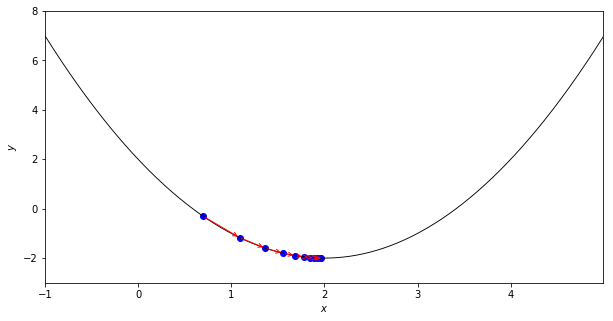

In [11]:
# Taking a new range for x

x = np.arange(-1, 5, 0.01)
y = fx(x)


fig, ax = plt.subplots(sharey = True)

# Setting x and y axes' parameters

ax.plot(x, y, lw = 0.9, color = 'k')
ax.set_xlim([min(x), max(x)])
ax.set_ylim([-3, max(y)+1])
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

# Running our user-defined function to get input for the plot

gd_x, gd_y = gradientdescent(prev_position, alpha, max_iters)

# Making a scatterplot of points along the curve

ax.scatter(gd_x, gd_y, c = 'b')

# Plotting the Descent

for i in range(1, max_iters+1):
    ax.annotate('', xy=(gd_x[i], gd_y[i]), xytext=(gd_x[i-1], gd_y[i-1]),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')

plt.show()


# Let's make an animation! 

In [12]:
from matplotlib import animation

plt.rcParams['figure.figsize'] = [13,6]

x = np.arange(-1, 5, 0.01)
y = fx(x)

fig, ax = plt.subplots(sharey = True)



ax.plot(x, y, lw = 0.9, color = 'k')
ax.set_xlim([min(x), max(x)])
ax.set_ylim([-3, max(y)+1])
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

gd_x, gd_y = gradientdescent(prev_position, alpha, max_iters)

# Creating our animation 
# Setting line and point parameters

line, = ax.plot([], [], 'r', label = 'Gradient descent', lw = 1.5)
point, = ax.plot([], [], 'bo')
value_display = ax.text(0.02, 0.02, '', transform=ax.transAxes)

# Defining an init function for our use-case

def init():
    line.set_data([], [])
    point.set_data([], [])
    value_display.set_text('')

    return line, point, value_display


# Defining the animate function that contains our x and y values

def animate(i):
    # Animate line
    line.set_data(gd_x[:i], gd_y[:i])
    
    # Animate points
    point.set_data(gd_x[i], gd_y[i])

    # Animate value display
    value_display.set_text('Min = ' + str(gd_y[i]))

    return line, point, value_display

# Plotting the Animation

ax.legend(loc = 1)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(gd_x), interval=120, 
                               repeat_delay=60, blit=True)
plt.close()

# Using the IPython Display module to embed and play our animation

from IPython.display import HTML
HTML(anim.to_html5_video())

# Et voila!

Local Minima is at
X    0.700000
Y   -1.998652
dtype: float64


### More code and explanation about GD to appear in the next slides.

**_Thank you!_**